# Homework 2
#### CS 273P Machine Learning and Data Mining (Winter 2025)

* Q1: Linear Regression from Scratch (30 points)
* Q2: Getting familiar with PyTorch (30 points)
* Statement of Collaboration (5 points)

## Submission guidelines
Once you have completed the assignment in this notebook, you should export a PDF from this notebook and submit it to Gradescope. You do not need to submit anything else. Make sure your PDF contains your code, the output of each cell, and your results are not blocked or clipped significantly. Once your PDF is uploaded to Gradescope, you will be prompted to match each question with the pages in your PDF, please make sure you complete this step and do it correctly. Since this is the second assignment, and we have made our submission guidelines clear, we will not accept any submission that does not follow the guidelines.

# Problem 1: Linear Regression from Scratch (30 points)

In [1]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

Let's generate some data points first, by the equation $y = x - 3$.

In [2]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)

y = x + -3 + 0.3*np.random.randn(100)

Let's then visualize the data points we just created.

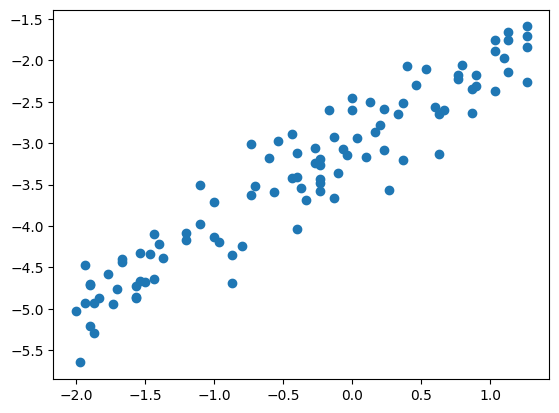

In [3]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model (5 points)

In the lecture, we learn that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial\theta}=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \left(x^{(i)}\right)$$

###Work Shown

The gradient of the cost function with respect to 𝜃 is:

$$\frac{\partial J(\theta)}{\partial\theta}=\frac{\partial}{\partial\theta}\left(\frac{1}{2 m} \sum_{i}^{m}(h_{\theta}\left(x^{(i)}\right)-y^{(i)})^{2}\right)=\frac{1}{2 m} \sum_{i}^{m}2\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)\frac{\partial}{\partial\theta}h_{\theta}\left(x^{(i)}\right)$$

Differentiate the hypothesis:

$$\frac{\partial}{\partial\theta}h_{\theta}\left(x^{(i)}\right)=x^{(i)}$$

Substituting this back into the expression:

$$\frac{\partial J(\theta)}{\partial\theta}=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}$$




## 1.2 Gradient of vanilla regularized regression model (5 points)

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m}\left(\sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)\left(x^{(i)}\right)+{\lambda}\sum_{j}^{n} \theta_{j}\right)$$

### Work Shown

The gradient of the cost function with respect to 𝜃 (as solved in part 1.1) is:

$$\frac{\partial J(\theta)}{\partial\theta}=\frac{\partial}{\partial\theta}\left(\frac{1}{2 m} \sum_{i}^{m}(h_{\theta}\left(x^{(i)}\right)-y^{(i)})^{2}\right)=\frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}$$

Differentiate the regularization term:

$$\frac{\partial}{\partial\theta}\left(\frac{\lambda}{2 m} \sum_{j}^{n}(\theta_{j})^{2}\right)=\frac{\lambda}{m}\theta_{j}$$

Combining the 2 Derivatives:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} \left(\sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x^{(i)}\right)+\frac{\lambda}{m}\sum_{j}^{n}\theta_{j}=\frac{1}{m}\left(\sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)\left(x^{(i)}\right)+{\lambda}\sum_{j}^{n} \theta_{j}\right)$$

## 1.3 Implement the cost function of a regularized regression model (5 points)

Please implement the cost function of a regularized regression model according to the above equations.

## 1.4 Implement the gradient of the cost function of a regularized regression model (5 points)

Please implement the gradient of the cost function of a regularized regression model according to the above equations.

In [4]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """

    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features

    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )

    # stores the updates on the cost function (loss function)
    cost_history_list = []

    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process

        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)

        # calculate the difference between the actual and predicted value
        error = y_estimated - y


##############################################################################################################
####################################### Begin of Question 1.3 ################################################
##############################################################################################################

        ##### Please write down your code here:####

        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = (1 / (2 * m)) * np.sum(error ** 2)


        ##### Please write down your code here:####

        # regularization term
        reg_term = (lambda_value / (2 * m)) * np.sum(np.square(W))


        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term

##############################################################################################################
####################################### End of Question 1.3 ##################################################
##############################################################################################################


##############################################################################################################
####################################### Begin of Question 1.4 ################################################
##############################################################################################################

        ##### Please write down your code here:####

        # calculate the gradient of the cost function with regularization term (Equation )
        gradient = (1 / m) * (X.T.dot(error) + (lambda_value * W))


        # Now we have to update our weights
        W = W - alpha * gradient

##############################################################################################################
####################################### End of Question 1.4 ##################################################
##############################################################################################################


        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)

    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")

    return W, cost_history_list

Run the following code to train your model.

Hint: If you have the correct code written above, the cost should be $0.5181222986588751$ when $\lambda = 10$.

Cost with regularization: 0.05165888565058274
Mean square error: 0.05165888565058274


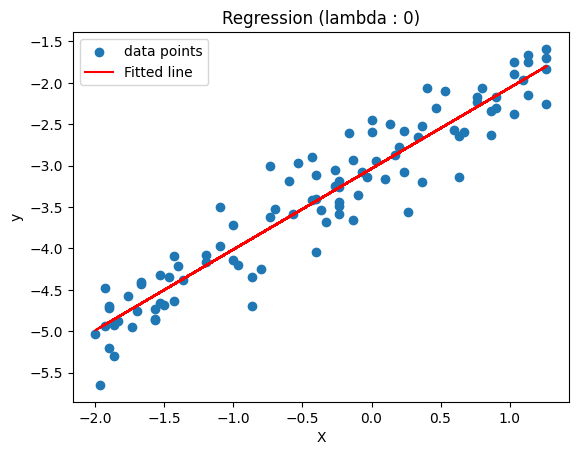

Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513126


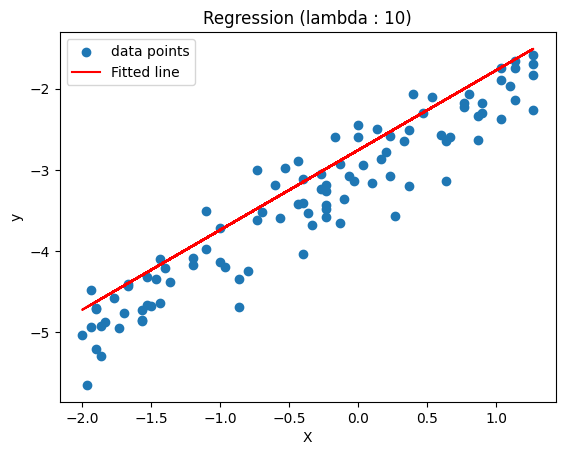

Cost with regularization: 2.793172488740026
Mean square error: 1.2785107029715972


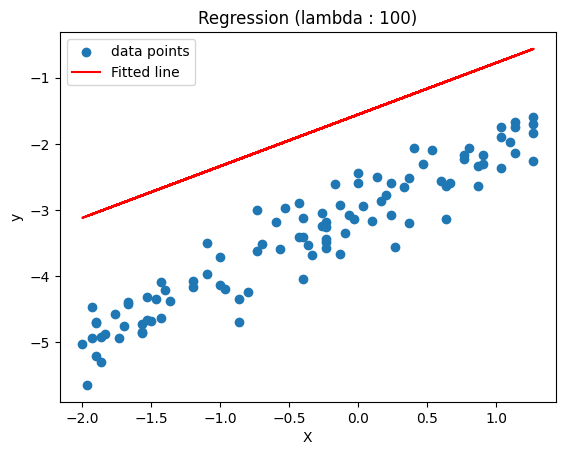

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496


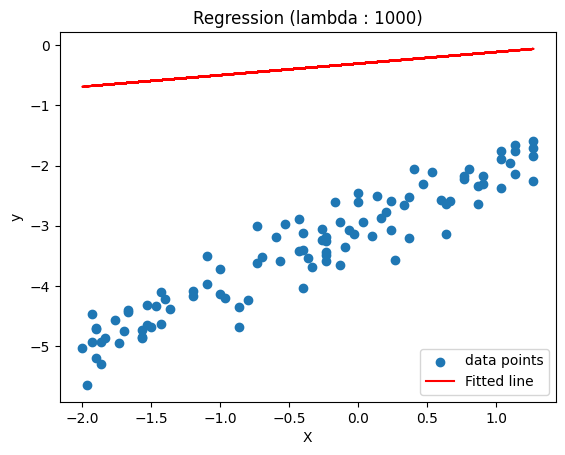

Cost with regularization: 6.2426956269339735
Mean square error: 6.1614425833558135


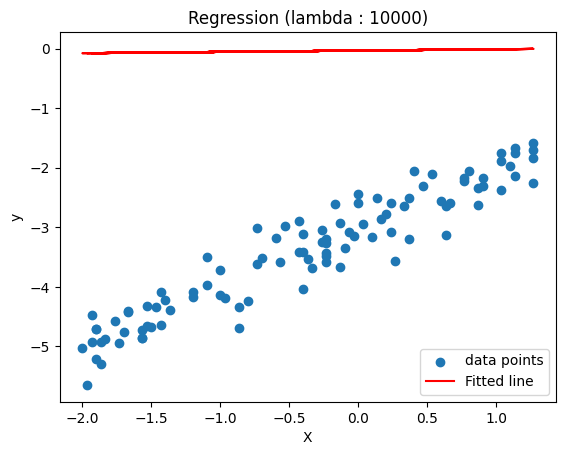

In [5]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)

    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## 1.5 Analyze your results (10 points)


According to the above figures, what's the best choice of $\lambda$?

Why the regressed line turns to be flat as we increase $\lambda$?

Your answer:

The best choice of 𝜆 based on the figures above is 0. The regressed line turns to be flat as we increase 𝜆 because as 𝜆 increases, θj (theta subscript j) must decrease in order to maintain a smaller cost.

# Problem 2: Getting familiar with PyTorch (30 points)

In [6]:
# !pip install mltools
# !pip show mltools
# # Change to the directory where mltools is installed
# !cd /usr/local/lib/python3.11/dist-packages

In [7]:
import mltools as ml
import torch

ModuleNotFoundError: No module named 'mltools'

## 2.1 Loading data (5 points)

In [ ]:
data = np.genfromtxt("data/curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False)
XtrP,params = ml.transforms.rescale(XtrP)

In [ ]:
# Your code:

XtrP_tensor = torch.from_numpy(XtrP)
Ytr_tensor = torch.from_numpy(Ytr).unsqueeze(-1)

XtrP_tensor = XtrP_tensor.float()
Ytr_tensor = Ytr_tensor.float()

XtrP_tensor.shape, Ytr_tensor.shape

## 2.2 Initialize Linear Regressor (5 points)

In [ ]:
linear_regressor = torch.nn.Linear(in_features=degree, out_features=1)

## 2.3 Set up optimizer and criterion

In [ ]:
# code given in assignment pdf

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(), lr=0.1)
epochs = 100000

## 2.4 raining the regressor using gradient descent (10 points)

In [ ]:
loss_record = []
for _ in range(epochs):
  # set gradient to 0
  optimizer.zero_grad()
  pred_y = linear_regressor(XtrP_tensor)
  loss = criterion(pred_y, Ytr_tensor)
  loss.backward()
  loss_record.append(loss.item())
  optimizer.step()

## 2.5 Plot the loss v.s. epochs (5 points)

In [ ]:
# code given in assignment pdf

plt.plot(range(epochs), (loss_record))

## 2.6 Visualize the trained linear regressor (5 points)

In [ ]:
# code given in assignment pdf

xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
xsP, _ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree=degree,bias=False), params)
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)

plt.scatter(Xtr,Ytr,label="training data")
plt.plot(xs,ys.detach().numpy(),label="prediction function",color ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Statement of Collaboration
It is mandatory to include a Statement of Collaboration in each submission, with respect to the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website.
For programming assignments, in particular, I encourage the students to organize (perhaps using Ed) to discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start working on it.

However, you should not discuss the specific solutions, and, as a guiding principle, you are not allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard, written notes, referring to Ed, etc.).

Especially after you have started working on the assignment, try to restrict the discussion to Ed as much as possible, so that there is no doubt as to the extent of your collaboration.

I worked on this assignment by myself using all available resources from Canvas.